## Part 2: CROP NEEDS 
This part has the objective to compute the crop water needs.
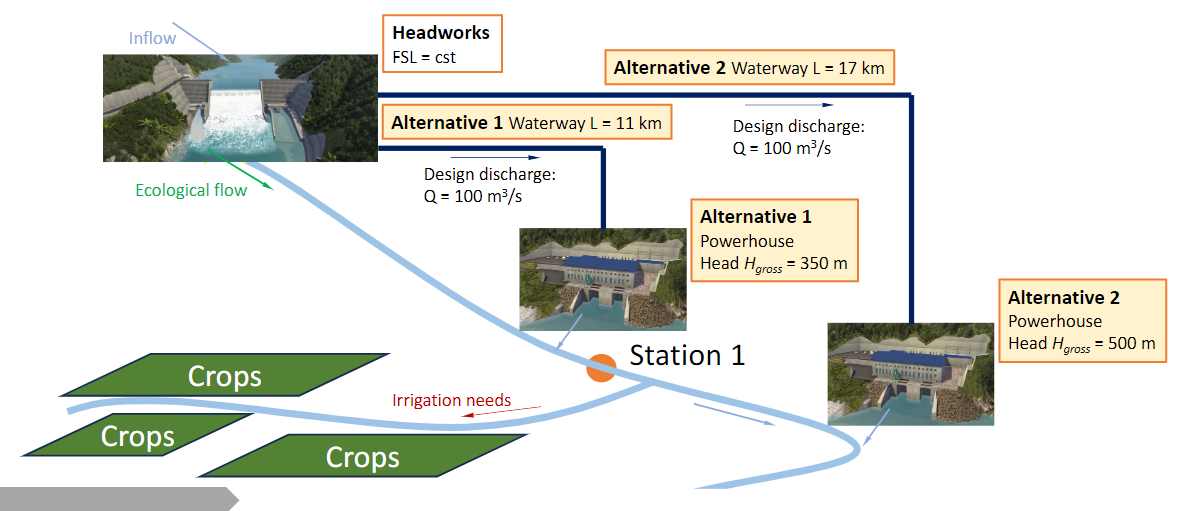

# a : Data loading

In [10]:
# imports
import pandas as pd 
import numpy as np 

In [11]:

# Months 
months = ['January', 'February', 'March','April', 'May', 'June', 'July', 'August','September','October','November','December'] 
#Temperatures [°C]
Temperatures=[4.72 ,24.88 ,25.71 ,26.68 ,27.02 ,26.47 ,25.94 ,25.92 ,25.9 ,25.83 ,25.65 ,25.21]
# Water req. to T ratio, [mm °C/day]
Water_T =  [3.81 ,5.04 ,4.62, 6.85, 6.17, 6.59, 6.78, 8.36, 6.96, 4.82, 4.50, 7.03] 
# Crop coefficient, Kc
Kc = [0.7, 1.1, 1.1, 0.5,0.7, 1.1, 1.1, 0.5,0.7, 1.1, 1.1, 0.5] 

#Mean cumulated monthly rainfall [mm/month]
Rainfall=[137, 96, 93, 97, 189, 248, 291, 310, 281, 280, 230, 207]

#Irrigated surface [ha]
S=370

#Number of days per month
N_days=30

# Time length growing season
N_days_growing_seas=120

# Number of growth cycles per year
N_growth=3

# Dictionary my_dict  
Crop_dict = {'Month': months, 
           'Temperature': Temperatures, 
           'Water_T': Water_T,
           'Kc': Kc,
           'Rainfall': Rainfall} 
 
 
# Build a DataFrame 
Crop_data = pd.DataFrame(Crop_dict) 

# Print cars 
print(Crop_data)

        Month  Temperature  Water_T   Kc  Rainfall
0     January         4.72     3.81  0.7       137
1    February        24.88     5.04  1.1        96
2       March        25.71     4.62  1.1        93
3       April        26.68     6.85  0.5        97
4         May        27.02     6.17  0.7       189
5        June        26.47     6.59  1.1       248
6        July        25.94     6.78  1.1       291
7      August        25.92     8.36  0.5       310
8   September        25.90     6.96  0.7       281
9     October        25.83     4.82  1.1       280
10   November        25.65     4.50  1.1       230
11   December        25.21     7.03  0.5       207


# 1
use the provided monthly mean temperature and related ratio to the reference evapotranspiration ET0 to obtain ET0

In [12]:
Crop_data['ET0']=Crop_data['Water_T']*(Crop_data['Temperature'])

#Crop_data['ET0']=Crop_data['Water_T']/(Crop_data['Temperature']-25)/


# 2 
Calculate the irrigation net water need using the mass balance equation and assuming that the reserve is zero each month and that effective precipitation is equal to falling rain amount (no interception nor losses)

In [13]:
Crop_data['ETM']=Crop_data['ET0']*Crop_data['Kc']
Crop_data['I']=(Crop_data['ETM']-Crop_data['Rainfall']/N_days)*S*10 #m3 water/day : /1000 *10000 (1ha)


De Moea: j'ai divisé par 1000 car 1mm= 10^-3 m3 (1mm de hauteur d'eau dans 1 m2) 

In [14]:
Crop_data

,Month,Temperature,Water_T,Kc,Rainfall,ET0,ETM,I
0,January,4.72,3.81,0.7,137,17.9832,12.58824,29679.821333
1,February,24.88,5.04,1.1,96,125.3952,137.93472,498518.464000
2,March,25.71,4.62,1.1,93,118.7802,130.65822,471965.414000
3,April,26.68,6.85,0.5,97,182.7580,91.37900,326138.966667
4,May,27.02,6.17,0.7,189,166.7134,116.69938,408477.706000
5,June,26.47,6.59,1.1,248,174.4373,191.88103,679373.144333
6,July,25.94,6.78,1.1,291,175.8732,193.46052,679913.924000
7,August,25.92,8.36,0.5,310,216.6912,108.34560,362645.386667
8,September,25.90,6.96,0.7,281,180.2640,126.18480,432227.093333
9,October,25.83,4.82,1.1,280,124.5006,136.95066,472184.108667


# 3
Use the irrigation efficiency for gravity irrigation in a sandy soil (check L4.3) to obtain the gross water need: B=Bn/e, with Bn calculated above

In [15]:
# efficiency gravity irrigation sandy soil
e_sand=0.35

Crop_data['Gross_I']=Crop_data['I']/e_sand #m3/day


# 4
Calculate the continous fictitious flowrate to irrigate the total assigned surface S; express the fictitious continuoum 
flowrate in m3/s; this is the flow  that is constantly provided each day of the month

In [ ]:
Crop_data['Flowrate']=Crop_data['Gross_I']/(24*3600) # m3/s
Crop_data.to_csv('data_P2/Crop_data.csv', index=False) # Save to csv file
Crop_data


,Month,Temperature,Water_T,Kc,Rainfall,ET0,ETM,I,Gross_I,Flowrate
0,January,4.72,3.81,0.7,137,17.9832,12.58824,29679.821333,8.479949e+04,0.981476
1,February,24.88,5.04,1.1,96,125.3952,137.93472,498518.464000,1.424338e+06,16.485399
2,March,25.71,4.62,1.1,93,118.7802,130.65822,471965.414000,1.348473e+06,15.607322
3,April,26.68,6.85,0.5,97,182.7580,91.37900,326138.966667,9.318256e+05,10.785019
4,May,27.02,6.17,0.7,189,166.7134,116.69938,408477.706000,1.167079e+06,13.507861
5,June,26.47,6.59,1.1,248,174.4373,191.88103,679373.144333,1.941066e+06,22.466043
6,July,25.94,6.78,1.1,291,175.8732,193.46052,679913.924000,1.942611e+06,22.483926
7,August,25.92,8.36,0.5,310,216.6912,108.34560,362645.386667,1.036130e+06,11.992242
8,September,25.90,6.96,0.7,281,180.2640,126.18480,432227.093333,1.234935e+06,14.293224
9,October,25.83,4.82,1.1,280,124.5006,136.95066,472184.108667,1.349097e+06,15.614554


# 5
Seek for a proportional relationship between the monthly mean river discharges that you calculated in Project Week 1 and the continous  fictitious flowrate for irrigation needs. These proportions will be used later for successive project 
phases

In [17]:
Monthly_avg_flow=pd.read_csv('data_P1\Monthly_mean_annual_flow')
Input=Monthly_avg_flow['Q1']
Need=Crop_data['Flowrate']

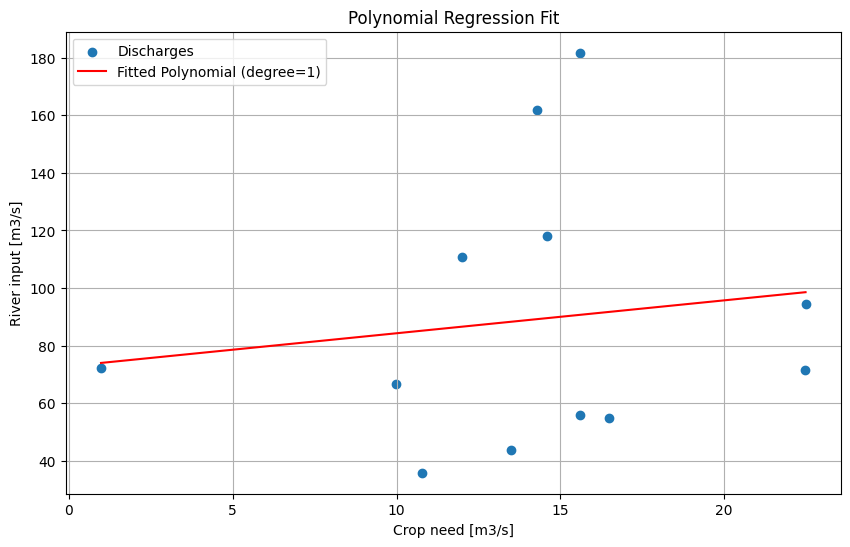

In [18]:
import matplotlib.pyplot as plt
# Fit a polynomial regression model
degree = 1
coefficients = np.polyfit(Need,Input, degree)
polynomial = np.poly1d(coefficients)

# Generate x values for the fitted curve
x_fit = np.linspace(Need.min(), Need.max(), 100)
y_fit = polynomial(x_fit)

# Plot the original data points and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(Need,Input, label='Discharges')
plt.plot(x_fit, y_fit, color='red', label=f'Fitted Polynomial (degree={degree})')
plt.ylabel('River input [m3/s]')
plt.xlabel('Crop need [m3/s]')
plt.grid()
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()